In [1]:
from warnings import filterwarnings
import pandas as pd


In [2]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width',200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df = pd.read_csv("amazon_reviews.csv")

In [4]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0


In [5]:
#Normalizing Case Folding
df["reviewText"]

0                                              No issues.
1       Purchased this for my device, it worked as adv...
2       it works as expected. I should have sprung for...
3       This think has worked out great.Had a diff. br...
4       Bought it with Retail Packaging, arrived legit...
                              ...                        
4910    I bought this Sandisk 16GB Class 10 to use wit...
4911    Used this for extending the capabilities of my...
4912    Great card that is very fast and reliable. It ...
4913    Good amount of space for the stuff I want to d...
4914    I've heard bad things about this 64gb Micro SD...
Name: reviewText, Length: 4915, dtype: object

In [6]:
df["reviewText"] = df["reviewText"].str.lower()

In [7]:
#Delete Punctuations
import string
df['reviewText'] = df['reviewText'].fillna('')
df['reviewText'] = df['reviewText'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [8]:
df['reviewText']

0                                               no issues
1       purchased this for my device it worked as adve...
2       it works as expected i should have sprung for ...
3       this think has worked out greathad a diff bran...
4       bought it with retail packaging arrived legit ...
                              ...                        
4910    i bought this sandisk 16gb class 10 to use wit...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable it c...
4913    good amount of space for the stuff i want to d...
4914    ive heard bad things about this 64gb micro sd ...
Name: reviewText, Length: 4915, dtype: object

In [9]:
#Delete Numbers
#df['reviewText'] = df['reviewText'].str.replace('\d', '')
df['reviewText'] = df['reviewText'].fillna('').apply(lambda x:''.join([i for i in x if not i.isdigit()]))

In [10]:
df['reviewText']

0                                               no issues
1       purchased this for my device it worked as adve...
2       it works as expected i should have sprung for ...
3       this think has worked out greathad a diff bran...
4       bought it with retail packaging arrived legit ...
                              ...                        
4910    i bought this sandisk gb class  to use with my...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable it c...
4913    good amount of space for the stuff i want to d...
4914    ive heard bad things about this gb micro sd ca...
Name: reviewText, Length: 4915, dtype: object

In [11]:
#Delete Stopwords
import nltk
from nltk.corpus import stopwords

In [12]:
sw = stopwords.words('english')

In [13]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
#lamda aracılığıyla bir x fonksiyonu tanımlıyoruz ve bu fonksiyon cümle boyunca geziyor( x str yapısında) sw yani stopwords ün içinde olmayan kelimeyi seçiyor ve join ile bu kelimeleri aralarına boşluk bırakarak birleştiriyor. 

In [14]:
df['reviewText']

0                                                  issues
1       purchased device worked advertised never much ...
2       works expected sprung higher capacity think ma...
3       think worked greathad diff bran gb card went s...
4       bought retail packaging arrived legit orange e...
                              ...                        
4910    bought sandisk gb class use htc inspire months...
4911    used extending capabilities samsung galaxy not...
4912    great card fast reliable comes optional adapte...
4913          good amount space stuff want fits gopro say
4914    ive heard bad things gb micro sd card crapping...
Name: reviewText, Length: 4915, dtype: object

In [15]:
#Delete Rarewords
#firstly find number of each word
temp_df = pd.Series(' '.join(df['reviewText']).split()).value_counts() #split variables and find wordcount

In [16]:
temp_df

card          4603
gb            1725
phone         1685
works         1559
great         1445
              ... 
lowdown          1
outmoded         1
stocking         1
cardsso          1
stealwould       1
Name: count, Length: 9697, dtype: int64

In [17]:
drops = temp_df[temp_df <= 1] #select drops words

In [18]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in drops))

In [19]:
#Tokenization
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sezgi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
#we can tokenization by using textblog
from textblob import Word, TextBlob
df["reviewText"].apply(lambda x:TextBlob(x).words).head()

0                                             [issues]
1    [purchased, device, worked, advertised, never,...
2    [works, expected, higher, capacity, think, mad...
3    [think, worked, gb, card, went, south, one, he...
4    [bought, retail, packaging, arrived, legit, en...
Name: reviewText, dtype: object

In [21]:
#Lemmanization
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sezgi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [23]:
df['reviewText']

0                                                   issue
1       purchased device worked advertised never much ...
2       work expected higher capacity think made bit e...
3       think worked gb card went south one held prett...
4       bought retail packaging arrived legit envelope...
                              ...                        
4910    bought sandisk gb class use htc inspire month ...
4911    used capability samsung galaxy note greatly ex...
4912    great card fast reliable come optional adapter...
4913           good amount space stuff want fit gopro say
4914    ive heard bad thing gb micro sd card crapping ...
Name: reviewText, Length: 4915, dtype: object

In [24]:
#Text Visualization
#Find term frequency
tf = df['reviewText'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

In [25]:
tf.columns = ["words", "tf"]

In [26]:
tf

,words,tf
0,issue,609.00
1,purchased,344.00
2,device,584.00
3,worked,460.00
4,advertised,111.00
...,...,...
3683,pureview,3.00
3684,laptoptablet,2.00
3685,employee,2.00
3686,sandisksequential,2.00


In [27]:
tf.sort_values("tf", ascending= False)

,words,tf
27,card,5537.00
14,work,2044.00
7,phone,1909.00
39,gb,1756.00
98,great,1445.00
...,...,...
2721,sizethe,2.00
2719,everybody,2.00
2717,lived,2.00
3687,chkdsk,2.00


In [28]:
tf[tf["tf"] > 500] #words which has tf greater than 500

,words,tf
0,issue,609.00
2,device,584.00
7,phone,1909.00
8,memory,1378.00
14,work,2044.00
26,note,514.00
27,card,5537.00
33,well,677.00
36,one,1120.00
39,gb,1756.00


<Axes: xlabel='words'>

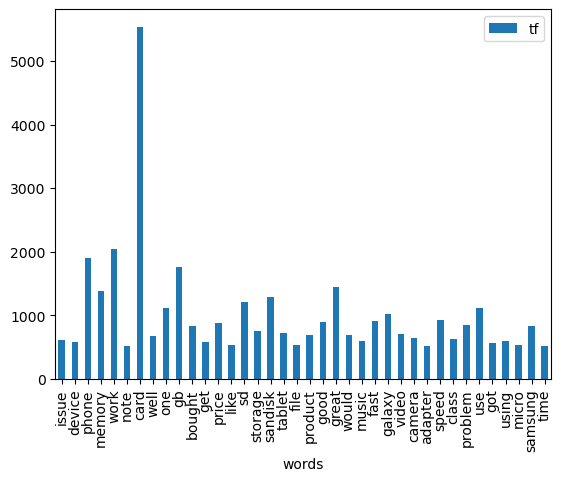

In [29]:
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")

In [30]:
#Word Cloud
#We need to compose all sentences as one sentences 
text = " ".join(i for i in df.reviewText)

In [31]:
#text

In [32]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(text)

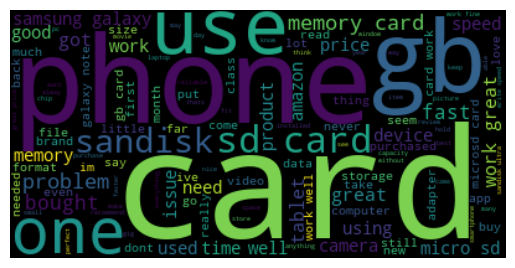

In [33]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show()
#If term frequency is large, word also be large in wordcloud

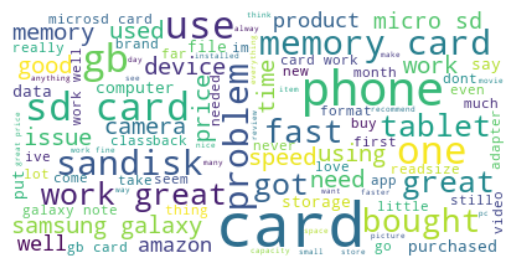

In [34]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [35]:
wordcloud.to_file("wordcloud.png")

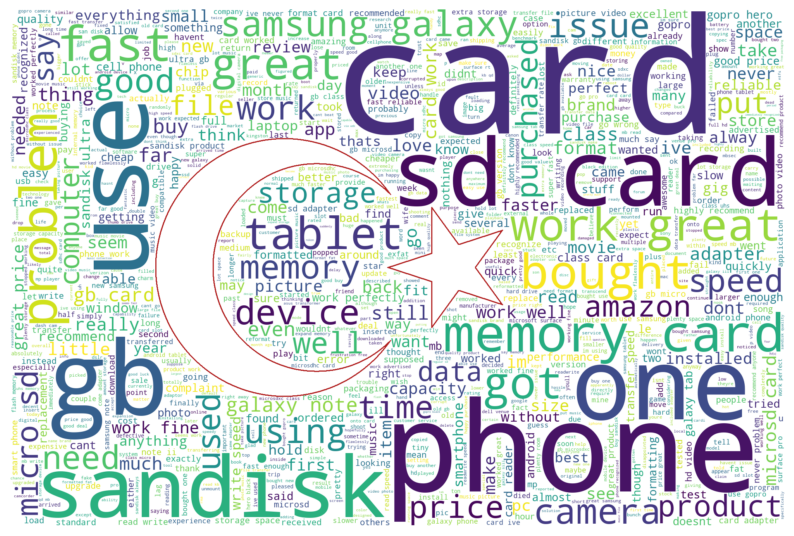

In [36]:
#Şablonlara göre wordcloud
import numpy as np
from PIL import Image
tr_mask = np.array(Image.open("tr.png"))
wc = WordCloud(background_color="white", 
               max_words = 1000,
               mask= tr_mask,
               contour_width=3,
               contour_color="firebrick")
wc.generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


In [37]:
#Sentiment Analysis
df["reviewText"]

0                                                   issue
1       purchased device worked advertised never much ...
2       work expected higher capacity think made bit e...
3       think worked gb card went south one held prett...
4       bought retail packaging arrived legit envelope...
                              ...                        
4910    bought sandisk gb class use htc inspire month ...
4911    used capability samsung galaxy note greatly ex...
4912    great card fast reliable come optional adapter...
4913           good amount space stuff want fit gopro say
4914    ive heard bad thing gb micro sd card crapping ...
Name: reviewText, Length: 4915, dtype: object

In [38]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sezgi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [39]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [40]:
sia.polarity_scores("Ezgi is beautiful girl") #pozitif, negatif score of words
#if compound greater than 0, it is positive; otherwise negative

{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.5994}

In [41]:
sia.polarity_scores("I like this music but it is not good as the other one")

{'neg': 0.209, 'neu': 0.673, 'pos': 0.118, 'compound': -0.3311}

In [42]:
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2    {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp...
3    {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...
4    {'neg': 0.0, 'neu': 0.747, 'pos': 0.253, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.108, 'neu': 0.598, 'pos': 0.295, 'co...
7    {'neg': 0.077, 'neu': 0.65, 'pos': 0.272, 'com...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.457, 'pos': 0.543, 'comp...
Name: reviewText, dtype: object

In [43]:
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

0   0.00
1   0.00
2   0.40
3   0.65
4   0.86
5   0.00
6   0.87
7   0.82
8   0.00
9   0.92
Name: reviewText, dtype: float64

In [44]:
df["polarity_score"] = df["reviewText"].apply(lambda x: sia.polarity_scores(x)["compound"])

In [45]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected higher capacity think made bit e...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked gb card went south one held prett...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,A2LBMKXRM5H2W9,B007WTAJTO,"ZM ""J""","[0, 0]",bought sandisk gb class use htc inspire month ...,1.00,Do not waste your money.,1374537600,2013-07-23,503,0,0,0.08
4911,ALGDLRUI1ZPCS,B007WTAJTO,Zo,"[0, 0]",used capability samsung galaxy note greatly ex...,5.00,Great item!,1377129600,2013-08-22,473,0,0,0.18
4912,A2MR1NI0ENW2AD,B007WTAJTO,Z S Liske,"[0, 0]",great card fast reliable come optional adapter...,5.00,Fast and reliable memory card,1396224000,2014-03-31,252,0,0,0.85
4913,A37E6P3DSO9QJD,B007WTAJTO,Z Taylor,"[0, 0]",good amount space stuff want fit gopro say,5.00,Great little card,1379289600,2013-09-16,448,0,0,0.69


In [46]:
df["reviewText"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

0    neg
1    neg
2    pos
3    pos
4    pos
5    neg
6    pos
7    pos
8    neg
9    pos
Name: reviewText, dtype: object

In [47]:
#create new column that decides whether the sentence is positive or negative
df["sentiment_label"] = df["reviewText"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

In [48]:
df["sentiment_label"]

0       neg
1       neg
2       pos
3       pos
4       pos
       ... 
4910    pos
4911    pos
4912    pos
4913    pos
4914    pos
Name: sentiment_label, Length: 4915, dtype: object

In [49]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score,sentiment_label
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00,neg
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00,neg
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected higher capacity think made bit e...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40,pos
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked gb card went south one held prett...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65,pos
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,A2LBMKXRM5H2W9,B007WTAJTO,"ZM ""J""","[0, 0]",bought sandisk gb class use htc inspire month ...,1.00,Do not waste your money.,1374537600,2013-07-23,503,0,0,0.08,pos
4911,ALGDLRUI1ZPCS,B007WTAJTO,Zo,"[0, 0]",used capability samsung galaxy note greatly ex...,5.00,Great item!,1377129600,2013-08-22,473,0,0,0.18,pos
4912,A2MR1NI0ENW2AD,B007WTAJTO,Z S Liske,"[0, 0]",great card fast reliable come optional adapter...,5.00,Fast and reliable memory card,1396224000,2014-03-31,252,0,0,0.85,pos
4913,A37E6P3DSO9QJD,B007WTAJTO,Z Taylor,"[0, 0]",good amount space stuff want fit gopro say,5.00,Great little card,1379289600,2013-09-16,448,0,0,0.69,pos


In [50]:
df["sentiment_label"].value_counts()

sentiment_label
pos    3944
neg     971
Name: count, dtype: int64

In [51]:
#mean of overall of positive and negative sentences
df.groupby("sentiment_label")["overall"].mean()

sentiment_label
neg   4.09
pos   4.71
Name: overall, dtype: float64

In [52]:
#Kullanacağım makine öğrenmesinin anlayacağı dilden bir target feature oluşması için sentiment_labelı string olarak değil de binary türünden tutmam lazım. Buna da binary encoding denir.
from sklearn.preprocessing import LabelEncoder
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

In [53]:
y = df["sentiment_label"] #dependent variable
x = df["reviewText"] #independent variable 

x bir cümle formatında, ben bunu ölçemiyorum. Benim bunu ölçülebilir bir formatta yapmam lazım, çünkü üzerinde makine öğrenmesi işlemleri yani matematiksel işlemler yapmak istiyorum.Kelimeleri vectörel olarak temsil etme, doğal dil işlemenin en önemli kısmıdır.
Yöntemler:
Count Vectors: frekans temsiller
TF-IDF Vectors: normalize edilmiş frekansı temsiller
Word Embedding: Word2Vec, Glove, BERT vs
Bu her yöntem için 3 durum vardır
words: kelimelerin numeric temsilleri
characters: karakterlerin numerik temsilleri
ngrams: kelime öbekleri

In [54]:
#Example of ngram
sentence = "hi, I am Ezgi Subaşı. I am computer engineering student.I am working about nlp"
TextBlob(sentence).ngrams(3)

[WordList(['hi', 'I', 'am']),
 WordList(['I', 'am', 'Ezgi']),
 WordList(['am', 'Ezgi', 'Subaşı']),
 WordList(['Ezgi', 'Subaşı', 'I']),
 WordList(['Subaşı', 'I', 'am']),
 WordList(['I', 'am', 'computer']),
 WordList(['am', 'computer', 'engineering']),
 WordList(['computer', 'engineering', 'student.I']),
 WordList(['engineering', 'student.I', 'am']),
 WordList(['student.I', 'am', 'working']),
 WordList(['am', 'working', 'about']),
 WordList(['working', 'about', 'nlp'])]

In [55]:
#Count Vectors
from sklearn.feature_extraction.text import CountVectorizer
corpus = ["This is first document.",
          "This document is second document.",
          "And this is third.",
          "Is this the first document?"]
#word frekans
vectorizer = CountVectorizer()
X_c = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out() #show unique word in the corpus

array(['and', 'document', 'first', 'is', 'second', 'the', 'third', 'this'],
      dtype=object)

In [56]:
X_c.toarray() #show vector

array([[0, 1, 1, 1, 0, 0, 0, 1],
       [0, 2, 0, 1, 1, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 1, 1],
       [0, 1, 1, 1, 0, 1, 0, 1]], dtype=int64)

In [57]:
#n-gram freakans
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2,2))
X_n = vectorizer2.fit_transform(corpus)
vectorizer2.get_feature_names_out()

array(['and this', 'document is', 'first document', 'is first',
       'is second', 'is third', 'is this', 'second document', 'the first',
       'this document', 'this is', 'this the'], dtype=object)

In [58]:
X_n.toarray() # ilk kelime öbeüi birinci cümlede var mı, ikinci kelime öbeği birinci cümlede var mı, üçüncü kelime öbeği (first document) ilk cümlede var o yüzden 1 

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1]], dtype=int64)

In [59]:
#Apply our dataset
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(x)

In [60]:
vectorizer.get_feature_names_out()[10:15]

array(['access', 'accessed', 'accessible', 'accessing', 'accessory'],
      dtype=object)

In [61]:
X_count.toarray()[10:15]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#TF-IDF (Term Frequency-Inverse Document Frequency
#Term Frequency: t teriminin ilgili dokümandaki frekansı(count vector) / dokümandaki toplam terim sayısı
#Inverse Document Frequency: 1+ loge ((toplam doküman sayısı-1) / (içinde t terimi olan doküman sayısı+1))
#+1 ler normalizayson için
#TF-IDF değeri = TF * IDF
#L2 normalization: Satırdaki hücrelerin kareleri toplamının karekökü bulunur, daha sonra ilgili satırdaki tüm hücreler bulunan değere bölünür.(her satır için yapılır)

In [62]:
#TF-IDF for words
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(x)

In [63]:
#Tf-IDF for n-grams
tf_idf_ngram_vectorizer = TfidfVectorizer()
X_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(x)

In [70]:
#Sentiment Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
log_model = LogisticRegression().fit(X_tf_idf_word,y)
#5 katlı çapraz doğrulama hatası
cross_val_score(log_model,
                X_tf_idf_word,
                y,
                scoring="accuracy",
                cv= 5).mean()
                

0.830111902339776

In [71]:
new_review = pd.Series("this product is great") #added new comment
new_review = TfidfVectorizer().fit(x).transform(new_review)#send new_review to TfidfVectroizer 
log_model.predict(new_review) #model predict, is review positive or negative( 1 is positive, 0 is negatve)

array([1])

In [72]:
new_review = pd.Series("look at that shit very bad")
new_review = TfidfVectorizer().fit(x).transform(new_review)
log_model.predict(new_review)

array([0])

In [75]:
random_review = pd.Series(df["reviewText"].sample(1).values) #get random review from dataset
print(random_review)
random_review = TfidfVectorizer().fit(x).transform(random_review)
log_model.predict(random_review)

0    great thing really small one put lost good
dtype: object


array([1])

In [76]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
#Count Vectors
rf_model = RandomForestClassifier().fit(X_count, y)
cross_val_score(rf_model, X_count,y,cv=5,n_jobs=-1).mean() # cv mean is 5 layer, n_jobs=-1 is use all processors 

0.8447609359104782

In [77]:
#Tf-IDF word level
rf_model = RandomForestClassifier().fit(X_tf_idf_word, y)
cross_val_score(rf_model,X_tf_idf_word,y,cv=5,n_jobs=-1).mean()

0.8266531027466939

In [78]:
#TF-IDF n-gram
rf_model = RandomForestClassifier().fit(X_tf_idf_ngram, y)
cross_val_score(rf_model,X_tf_idf_ngram,y,cv=5,n_jobs=-1).mean()

0.8274669379450662

Random forest hiperparametrelere sahiptir yani kendiliğinden öğrenemeyeceği bu yüzden developerın vermesi gereken şeylere. Bu yüzden hiperparametre optimizasyonu yapmamız gereklidir.Bunu random forest daha başarılı tahninlerde bulunsun diye yapıyoruz.

In [81]:
#Hiperparameter Optimzation
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestClassifier(random_state=17)
rf_params = {"max_depth":[8, None],
             "max_features": [7, "auto"],
             "min_samples_split":[2,5,8],
             "n_estimators":[100,200]}

rf_best_grid = GridSearchCV(rf_model,
                            rf_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=True).fit(X_count, y) 
#verbose=True or verbose=1 is mean of report me

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [82]:
rf_best_grid.best_params_ #show random forest parameters

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 100}

yani benim aslında yukarıda yaptığım şeyler, random forest defult bazı değerlere sahip, ben projem için bu değerleri kendime göre ayarlıyorum.

In [83]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X_count, y) #compose finel model with paramaters are setted
#** mean is get all keys and values

In [84]:
cross_val_score(rf_final, X_count, y, cv=5, n_jobs=-1).mean()

0.8386571719226856

In [ ]:
#parametreleri çok iyi ayarlamadığımız için böyle oldu, daha iyi ayarlarsak daha iyi sonuçlar alırız